In [1]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# data load
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)

# split into X, Y
X = dataset[:, 0:8]
Y = dataset[:, 8:]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

label = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

# training
# model = XGBClassifier(max_depth=2, feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
model = XGBClassifier(feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
model.fit(x_train, y_train)

# prediction
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:53:46] WARNING: ../src/learner.cc:576: 
Parameters: { "feature_names" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:53:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 74.03


In [2]:
value = [[1, 162, 72, 35, 0, 28.1, 0.527, 20]]

l = model.predict_proba(value)
print('No diabetes : {:.2%}\n Yes diabetes : {:.2%}'.format(l[0][0], l[0][1]))

No diabetes : 47.03%
 Yes diabetes : 52.97%


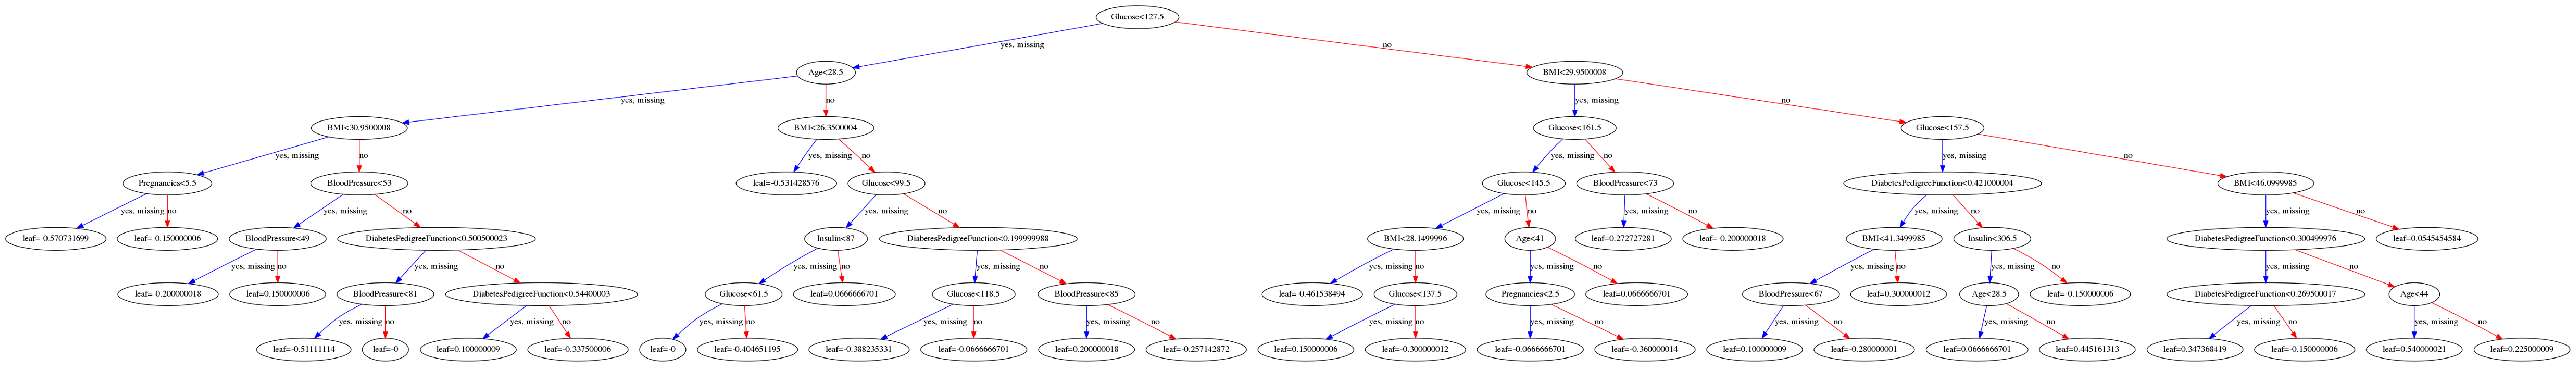

In [3]:
%matplotlib inline
import os

from xgboost import plot_tree

from matplotlib import pyplot as plt
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 100, 200

# visualize Decision Tree
# model.get_booster().feature_names()
# model.get_booster().feature_names(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
plot_tree(model, num_trees=0, fmap='pima_featuremap.txt')
plt.show()


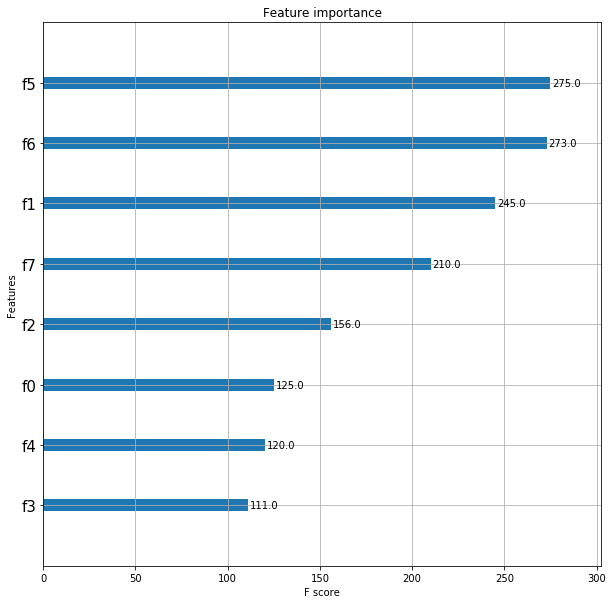

In [4]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not fou

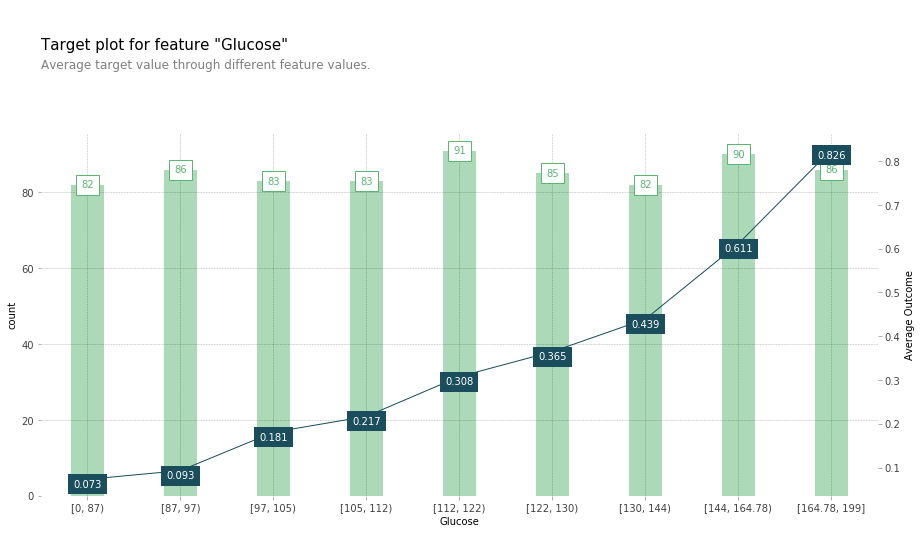

In [5]:
# *** Drawing Target Plots

from pdpbox import info_plots
import pandas as pd

pima_data = pd.read_csv('diabetes.csv')
pima_features = pima_data.columns[:8]
pima_target = pima_data.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


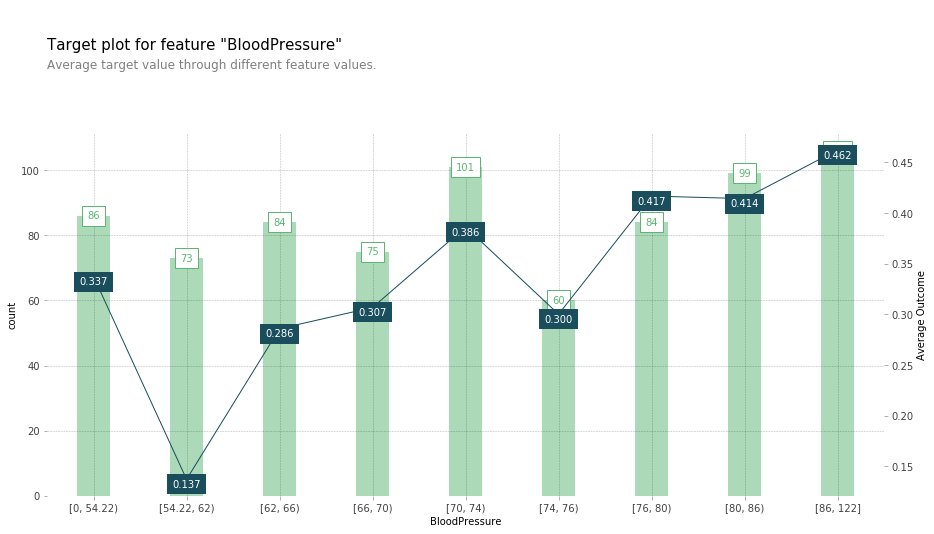

In [6]:
# *** Drawing Target Plots

from pdpbox import info_plots
import pandas as pd

pima_data = pd.read_csv('diabetes.csv')
pima_features = pima_data.columns[:8]
pima_target = pima_data.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target=pima_target
)

In [7]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


/usr/local/lib/python3.6/dist-packages/pdpbox/info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to

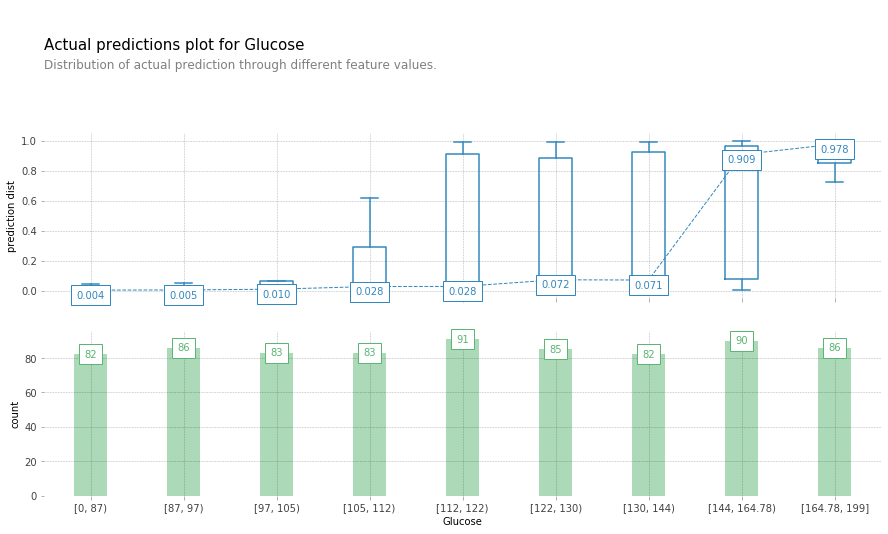

In [8]:
# *** Prediction Distribution Plot

fig, axes, summary_df = info_plots.actual_plot(model=model,
                                               X=pima_data[pima_features],
                                               feature='Glucose',
                                               feature_name='Glucose',
                                               predict_kwds={})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


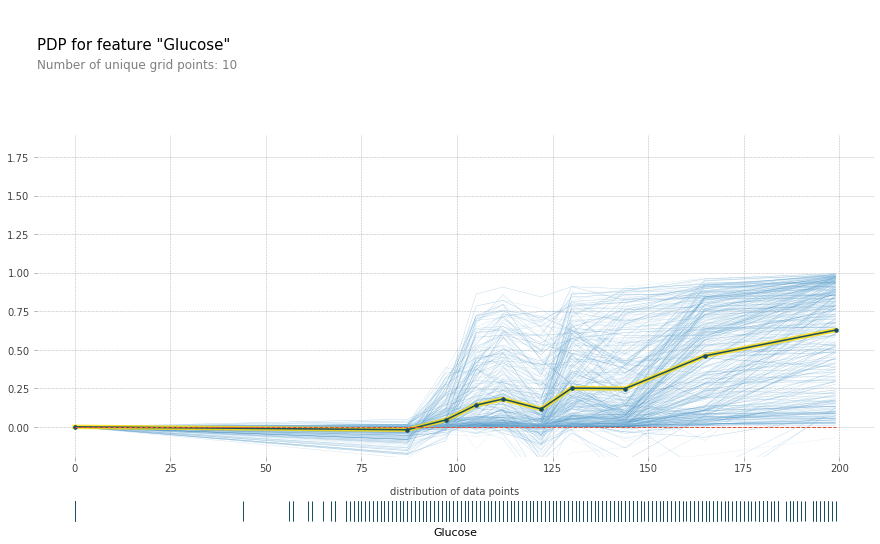

In [9]:
# *** Partial Dependence Plot
from pdpbox import pdp

pdp_gc = pdp.pdp_isolate(model=model, 
                         dataset= pima_data, 
                         model_features=pima_features, 
                         feature='Glucose')

# Set plot
fig, axes = pdp.pdp_plot(pdp_gc, 
                         'Glucose', 
                         plot_lines=True, 
                         frac_to_plot=0.5, 
                         plot_pts_dist=True)

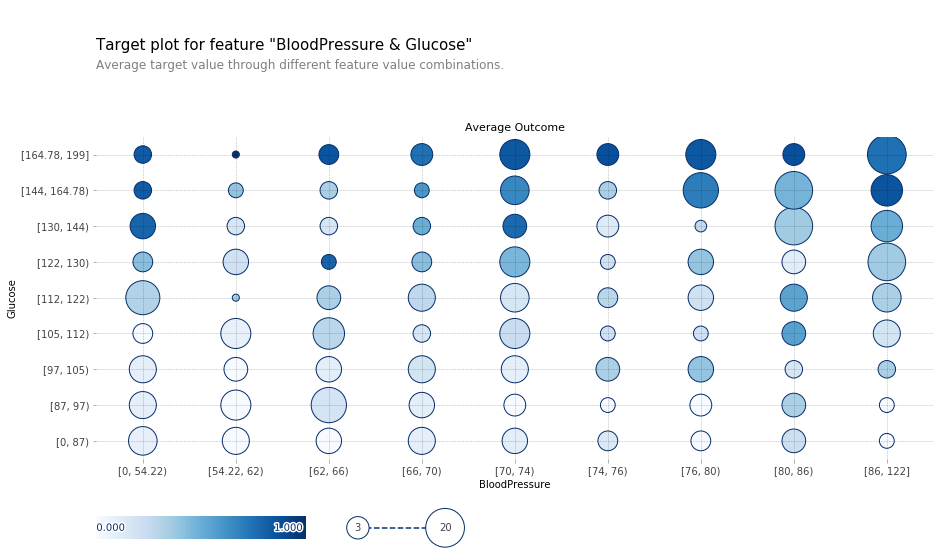

In [10]:
fig, axes, summary_df = info_plots.target_plot_interact(df=pima_data, 
                                                        features=['BloodPressure', 'Glucose'], 
                                                        feature_names=['BloodPressure', 'Glucose'], 
                                                        target=pima_target)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


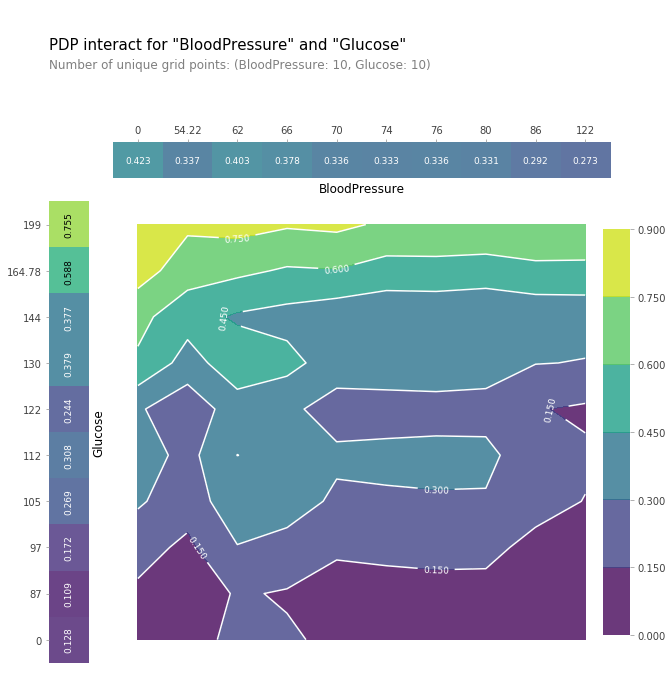

In [11]:
pdp_interaction = pdp.pdp_interact(model=model, 
                                   dataset=pima_data, 
                                   model_features=pima_features, 
                                   features=['BloodPressure', 'Glucose'])

fig, axes = pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, 
                                  feature_names=['BloodPressure', 'Glucose'], 
                                  plot_type='contour', 
                                  x_quantile=True, 
                                  plot_pdp=True)

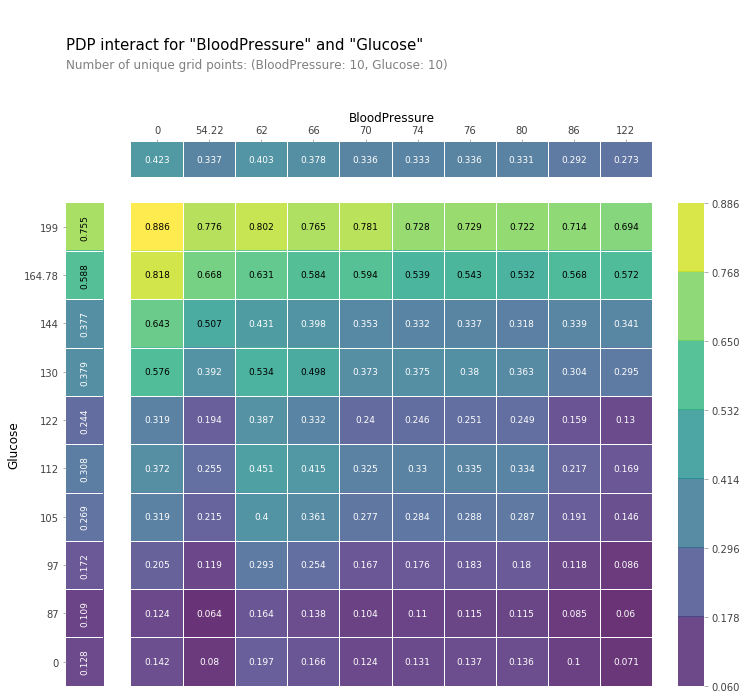

In [12]:
pdp_interaction = pdp.pdp_interact(model=model, 
                                   dataset=pima_data, 
                                   model_features=pima_features, 
                                   features=['BloodPressure', 'Glucose'])

fig, axes = pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction, 
                                  feature_names=['BloodPressure', 'Glucose'], 
                                  plot_type='grid', 
                                  x_quantile=True, 
                                  plot_pdp=True)

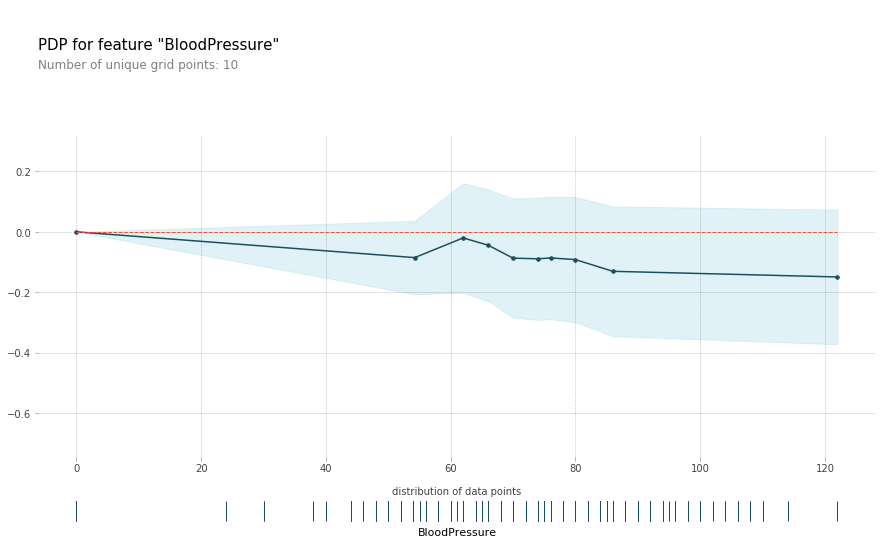

In [13]:
pdp_bp = pdp.pdp_isolate(model=model, 
                         dataset=pima_data, 
                         model_features=pima_features, 
                         feature='BloodPressure')

fig, axes = pdp.pdp_plot(pdp_bp, 
                         'BloodPressure', 
                         plot_lines=False, 
                         frac_to_plot=0.5, 
                         plot_pts_dist=True)

In [14]:
# *** grid search
import numpy as np
from sklearn.model_selection import GridSearchCV

cv_params = {
    'max_depth' : np.arange(1, 6, 1)
}

fix_params = {
    'booster' : 'gbtree',
    'objective' : 'binary:logistic',
}

csv = GridSearchCV(XGBClassifier(**fix_params), 
                   cv_params, 
                   scoring='precision', 
                   cv=5, 
                   n_jobs=5)
csv.fit(x_train, y_train)

print(csv.best_params_)

# predict test data
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %2f" % (accuracy * 100.0))

exception calling callback for <Future at 0x7fa3fb7e9da0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [15]:
import numpy as np
from sklearn.model_selection import GridSearchCV

cv_params = {
    'max_depth':np.arange(1, 6, 1),
    'learning_rate':np.arange(0.05, 0.6, 0.05),
    'n_estimators':np.arange(50, 300, 50),
}

fix_params = {
    'booster':'gbtree',
    'objective':'binary:logistic',
}

csv = GridSearchCV(estimator=XGBClassifier(**fix_params), 
                   param_grid=cv_params, 
                   scoring='precision', 
                   cv=5, 
                   n_jobs=2)
csv.fit(x_train, y_train)

# print out optimized parameters
print(csv.best_params_)

# predict test dataset
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f' % (accuracy * 100.0))

# print out every combinations
for parameter in csv.cs_results_['params']:
    print(parameter)

KeyboardInterrupt: 